# T14 Project 1 - KickStarter Data Analysis

##  Zoe Teoh, Bharath Prabhu

### Motivation Behind Project

With the rise of technology, creating has never been easier. From prototyping physical products with 3D printers to the development of several rapid prototyping methodologies, innovation and entrepreneurship amongst members of all generations has scaled to new heights. However very few innovations, if any at all, are successful and able to create real societal change. Therefore, this begs the question of what kind of ideas do turn to reality? Is it possible to tell, given some features of any ideas (projects), as to whether they will become successful?

In this project's context, we mostly define success as an idea that has gained its required level of funding or more, in order to get off the ground

This problem has unique significance in that many successful ideas and innovations vary in scope and size. Larger start-ups can seek out venture capitalists for funding whereas smaller start-ups may not have that luxury. But does that necessarily mean that the idea won’t become successful? Thus, our team decided to investigate Kickstarter, an online platform that crowdfunds ideas of all sizes and scopes.

Through this project, we hope to gain some valuable insights, and perhaps surprises, as to what might help get an idea off the ground and what ideas might never come to fruition due to various circumstances.

### A peek into the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
pd.options.display.html.use_mathjax = False

%matplotlib inline

In [2]:
# load the data in and read the data
ks_projects_2018 = pd.read_csv('ks-projects-201801.csv')
ks_projects_2016 = pd.read_csv('ks-projects-201612.csv', low_memory = False)

In [3]:
ks_projects_2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
ks_projects_2016.head()

ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   \
0  2015-08-11 12:12:28        0      failed        0       GB            0   
1  2013-01-12 00:20:50      220      failed        3       US          220   
2  2012-03-17 03:24:11        1      failed        1       US            1   
3  2015-07-04 08:35:03     1283    canceled       14       US         1283   
4  2016-02-26 13:38:27    52375  successful      224       US        52375   

  Unnamed: 13 Unnamed: 14 Unnamed: 15  Unnamed: 16  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN

In [5]:
(len(ks_projects_2018), len(ks_projects_2016))

(378661, 323750)

There are a total of 378,661 rows in the 2018 dataset and 323,750 rows in the 2016 dataset. Each row represents a project published onto Kickstarter. The 2018 dataset contains all projects until 2018 while the 2016 dataset contains all projects until 2016. There are a total of 15 columns in each dataset - ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd_pledged, usd_pledged_real and usd_goal_real. Most of these columns store several key attributes of each project that will our team will use to explore different questions that can hopefully get us some insight into projects of various type

In [6]:
ks_projects_2018.columns = [col.strip() for col in ks_projects_2018.columns]
ks_projects_2016.columns = [col.strip() for col in ks_projects_2016.columns]

In [7]:
len(pd.merge(ks_projects_2016, ks_projects_2018, left_on = 'ID', right_on = 'ID'))

323750

The 2016 project file has many unnamed columns with NaN values. Furthermore, when merging the 2 datasets on the ID, the merged dataset has as many rows as the 2016 file, which shows that the 2018 file is more updated with a larger number of projects. Therefore, we shall be only using the 2018 file for our analysis

## Questions we would like to answer

    1. Which main / sub categories of projects have the greatest success?
    
    2. Which range of fundraising goal amounts has the highest success rate in meeting their goal amounts?
    
    3. Which time of the year is the best time to launch a kickstarter project? / Do certain time durations of the projects        have better success rates than other?
    
    4. Which country has the highest success rate of projects

### Data Cleanup

The code below does some basic cleanup of the data as follows:
    1. Setting the ID field as the index of the dataset
    2. Dropping unnamed and NaN columns from the dataset

In [8]:
ks_projects_2018 = ks_projects_2018.set_index('ID')

In [9]:
ks_projects_2018.head()

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000011046  Community Film Project: The Art of Neighborhoo...    Film & Video   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000011046  Film & Video      USD  2015-08-29  19500.0  2015-07-04 08:35:03   

            pledged     state  backers country  usd pledged  usd_pledged_real  \
ID                                                                              
1000002330      0.0    failed        0      GB          0.0               0.0   
1000003930   2421.0    failed       15      US        100.0            2421.0   
1000004038    220.0    failed        3      US        220.0             220.0   
1000007540      1.0    failed        1      US          1.0               1.0   
1000011046   1283.0  canceled       14      US       1283.0            1283.0   

            usd_goal_real  
ID                         
1000002330        1533.95  
1000003930       30000.00  
1000004038       45000.00  
1000007540        5000.00  
1000011046       19500.00

In [10]:
ks_projects_2018[ks_projects_2018.isnull().any(axis=1)].head()

name      category  \
ID                                                                    
1000694855              STREETFIGHTERZ WHEELIE MURICA  Film & Video   
100149523                 Duncan Woods - Chameleon EP         Music   
1003023003  The Making of Ashley Kelley's Debut Album         Music   
1003130892               Butter Side Down Debut Album         Music   
1003629045                    Chase Goehring debut EP         Music   

           main_category currency    deadline    goal             launched  \
ID                                                                           
1000694855  Film & Video      USD  2014-09-20  6500.0  2014-08-06 21:28:36   
100149523          Music      AUD  2015-08-25  4500.0  2015-08-04 12:05:17   
1003023003         Music      USD  2015-04-09  3500.0  2015-03-10 20:06:13   
1003130892         Music      USD  2015-11-26  6000.0  2015-11-02 22:09:19   
1003629045         Music      USD  2016-03-21  3000.0  2016-02-23 03:09:49   

            pledged      state  backers country  usd pledged  \
ID                                                             
1000694855   555.00  undefined        0    N,0"          NaN   
100149523   4767.00  undefined        0    N,0"          NaN   
1003023003  3576.00  undefined        0    N,0"          NaN   
1003130892  7007.80  undefined        0    N,0"          NaN   
1003629045  3660.38  undefined        0    N,0"          NaN   

            usd_pledged_real  usd_goal_real  
ID                                           
1000694855            555.00        6500.00  
100149523            3402.08        3211.53  
1003023003           3576.00        3500.00  
1003130892           7007.80        6000.00  
1003629045           3660.38        3000.00

The 'USD_pledged column' as NaN values and is not really required for our analysis as it is a duplicate column where the values are present in the 'USD_pledged_real column'. Therefore we will drop the 'USD_pledged column'.

In [11]:
ks_projects_2018 = ks_projects_2018.drop(['usd pledged'], axis=1)

### Add extra columns required for analysis

To answer questions related to time duration of the project, namely Q3, we first need to extract the day, month, year for launch and deadline dates and calculate the time duration (in days) between the 2 dates. All of these will be stored in separate columns

In [12]:
def extract_launch_date(launch_date):
    '''
    Given a date string from the 'launched' column, this function extracts 
    the month of that date and returns the month as an integer
    '''
    launch_date = launch_date.split(" ")
    date, time = launch_date
    date_list = date.split("-")
    year, month, day = date_list
    return(int(year), int(month), int(day))

In [13]:
# store the launch date values as separate columns
ks_projects_2018['launch_year'] = [extract_launch_date(date)[0] for date in ks_projects_2018['launched']]
ks_projects_2018['launch_month'] = [extract_launch_date(date)[1] for date in ks_projects_2018['launched']]
ks_projects_2018['launch_day'] = [extract_launch_date(date)[2] for date in ks_projects_2018['launched']]

In [14]:
ks_projects_2018.head()

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000011046  Community Film Project: The Art of Neighborhoo...    Film & Video   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000011046  Film & Video      USD  2015-08-29  19500.0  2015-07-04 08:35:03   

            pledged     state  backers country  usd_pledged_real  \
ID                                                                 
1000002330      0.0    failed        0      GB               0.0   
1000003930   2421.0    failed       15      US            2421.0   
1000004038    220.0    failed        3      US             220.0   
1000007540      1.0    failed        1      US               1.0   
1000011046   1283.0  canceled       14      US            1283.0   

            usd_goal_real  launch_year  launch_month  launch_day  
ID                                                                
1000002330        1533.95         2015             8          11  
1000003930       30000.00         2017             9           2  
1000004038       45000.00         2013             1          12  
1000007540        5000.00         2012             3          17  
1000011046       19500.00         2015             7           4

In [15]:
def extract_deadline_date(deadline_date):
    '''
    Given a date string from the 'launched' column, this function extracts 
    the month of that date and returns the month as an integer
    '''
    date_list = deadline_date.split("-")
    year, month, day = date_list
    return(int(year), int(month), int(day))

In [16]:
# store the launch date values as separate columns
ks_projects_2018['deadline_year'] = [extract_deadline_date(date)[0] for date in ks_projects_2018['deadline']]
ks_projects_2018['deadline_month'] = [extract_deadline_date(date)[1] for date in ks_projects_2018['deadline']]
ks_projects_2018['deadline_day'] = [extract_deadline_date(date)[2] for date in ks_projects_2018['deadline']]

In [17]:
ks_projects_2018.head()

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000011046  Community Film Project: The Art of Neighborhoo...    Film & Video   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000011046  Film & Video      USD  2015-08-29  19500.0  2015-07-04 08:35:03   

            pledged     state  backers country  usd_pledged_real  \
ID                                                                 
1000002330      0.0    failed        0      GB               0.0   
1000003930   2421.0    failed       15      US            2421.0   
1000004038    220.0    failed        3      US             220.0   
1000007540      1.0    failed        1      US               1.0   
1000011046   1283.0  canceled       14      US            1283.0   

            usd_goal_real  launch_year  launch_month  launch_day  \
ID                                                                 
1000002330        1533.95         2015             8          11   
1000003930       30000.00         2017             9           2   
1000004038       45000.00         2013             1          12   
1000007540        5000.00         2012             3          17   
1000011046       19500.00         2015             7           4   

            deadline_year  deadline_month  deadline_day  
ID                                                       
1000002330           2015              10             9  
1000003930           2017              11             1  
1000004038           2013               2            26  
1000007540           2012               4            16  
1000011046           2015               8            29

In [18]:
def time_duration(deadline_date, launch_date):
    '''
    Given the deadline_date and launch_date the function calculates the number of days 
    between the 2 dates
    '''
    deadline_year, deadline_month, deadline_day = extract_deadline_date(deadline_date)
    launch_year, launch_month, launch_day = extract_launch_date(launch_date)
    
    deadline_days_total =  ((deadline_year-1)*365) + ((deadline_month-1)*30) + deadline_day
    launch_days_total = ((launch_year-1)*365) + ((launch_month-1)*30) + launch_day

    return(deadline_days_total - launch_days_total)

In [19]:
date_tuple = list(zip(ks_projects_2018['deadline'], ks_projects_2018['launched']))
ks_projects_2018['time_duration'] = [time_duration(date[0], date[1]) for date in date_tuple]

In [20]:
ks_projects_2018.head().T

ID                                     1000002330  \
name              The Songs of Adelaide & Abullah   
category                                   Poetry   
main_category                          Publishing   
currency                                      GBP   
deadline                               2015-10-09   
goal                                         1000   
launched                      2015-08-11 12:12:28   
pledged                                         0   
state                                      failed   
backers                                         0   
country                                        GB   
usd_pledged_real                                0   
usd_goal_real                             1533.95   
launch_year                                  2015   
launch_month                                    8   
launch_day                                     11   
deadline_year                                2015   
deadline_month                                 10   
deadline_day                                    9   
time_duration                                  58   

ID                                                   1000003930  \
name              Greeting From Earth: ZGAC Arts Capsule For ET   
category                                         Narrative Film   
main_category                                      Film & Video   
currency                                                    USD   
deadline                                             2017-11-01   
goal                                                      30000   
launched                                    2017-09-02 04:43:57   
pledged                                                    2421   
state                                                    failed   
backers                                                      15   
country                                                      US   
usd_pledged_real                                           2421   
usd_goal_real                                             30000   
launch_year                                                2017   
launch_month                                                  9   
launch_day                                                    2   
deadline_year                                              2017   
deadline_month                                               11   
deadline_day                                                  1   
time_duration                                                59   

ID                         1000004038  \
name                   Where is Hank?   
category               Narrative Film   
main_category            Film & Video   
currency                          USD   
deadline                   2013-02-26   
goal                            45000   
launched          2013-01-12 00:20:50   
pledged                           220   
state                          failed   
backers                             3   
country                            US   
usd_pledged_real                  220   
usd_goal_real                   45000   
launch_year                      2013   
launch_month                        1   
launch_day                         12   
deadline_year                    2013   
deadline_month                      2   
deadline_day                       26   
time_duration                      44   

ID                                                       1000007540  \
name              ToshiCapital Rekordz Needs Help to Complete Album   
category                                                      Music   
main_category                                                 Music   
currency                                                        USD   
deadline                                                 2012-04-16   
goal                                                           5000   
launched                                        2012-03-17 03:24:11   
pledged                                         

One of the metrics we use to measure the success of a project, apart from the project status ('state' column), is the % (fraction) of goal amount that is met by a kickstarter project. Thus, for ease of analysis, we will be storing it as a column in the dataset

In [21]:
def percent_goal_reached(pledged_amount, goal_amount):
    '''
    Given 2 floats, the goal amount and the pledge amount, the function returns 
    the percent of the goal amount accomplished by the project
    '''
    return(pledged_amount / goal_amount)

In [22]:
# append the percent_goal_reached as a column to the dataframe
amount_tuple = list(zip(ks_projects_2018['usd_pledged_real'], ks_projects_2018['usd_goal_real']))
ks_projects_2018['fraction_goal'] = [percent_goal_reached(amount[0], amount[1]) for amount in amount_tuple]

In [23]:
ks_projects_2018.head().T

ID                                     1000002330  \
name              The Songs of Adelaide & Abullah   
category                                   Poetry   
main_category                          Publishing   
currency                                      GBP   
deadline                               2015-10-09   
goal                                         1000   
launched                      2015-08-11 12:12:28   
pledged                                         0   
state                                      failed   
backers                                         0   
country                                        GB   
usd_pledged_real                                0   
usd_goal_real                             1533.95   
launch_year                                  2015   
launch_month                                    8   
launch_day                                     11   
deadline_year                                2015   
deadline_month                                 10   
deadline_day                                    9   
time_duration                                  58   
fraction_goal                                   0   

ID                                                   1000003930  \
name              Greeting From Earth: ZGAC Arts Capsule For ET   
category                                         Narrative Film   
main_category                                      Film & Video   
currency                                                    USD   
deadline                                             2017-11-01   
goal                                                      30000   
launched                                    2017-09-02 04:43:57   
pledged                                                    2421   
state                                                    failed   
backers                                                      15   
country                                                      US   
usd_pledged_real                                           2421   
usd_goal_real                                             30000   
launch_year                                                2017   
launch_month                                                  9   
launch_day                                                    2   
deadline_year                                              2017   
deadline_month                                               11   
deadline_day                                                  1   
time_duration                                                59   
fraction_goal                                            0.0807   

ID                         1000004038  \
name                   Where is Hank?   
category               Narrative Film   
main_category            Film & Video   
currency                          USD   
deadline                   2013-02-26   
goal                            45000   
launched          2013-01-12 00:20:50   
pledged                           220   
state                          failed   
backers                             3   
country                            US   
usd_pledged_real                  220   
usd_goal_real                   45000   
launch_year                      2013   
launch_month                        1   
launch_day                         12   
deadline_year                    2013   
deadline_month                      2   
deadline_day                       26   
time_duration                      44   
fraction_goal              0.00488889   

ID                                                       1000007540  \
name              ToshiCapital Rekordz Needs Help to Complete Album   
category                                                      Music   
main_category                                                 Music   
currency                                                        USD   
deadline                                                 2012-04-16   
goal                         

In [33]:
# should you wish to download the cleaned up version of this data
ks_projects_2018.to_csv('ks_projects_2018_clean.csv')

## Question Analysis

### Q1 : Which main / sub categories of projects have the greatest success?

For this question we measured success based on the 'state' column of our dataset that classifies whether a project is successful or not. Furthermore to get a better understanding of 'success' itself, we also analyzed the average 'percentage of goal reached' for each 'state' across categories and subcategories to perhaps gain a better understanding of the extent of backing that different projects have received

<b> Note </b> : If a project is successful, based on the 'state' column, that project is guaranteed to have met its goal by at least 100%, therefore the average value is meant to get a measure on the extent of success

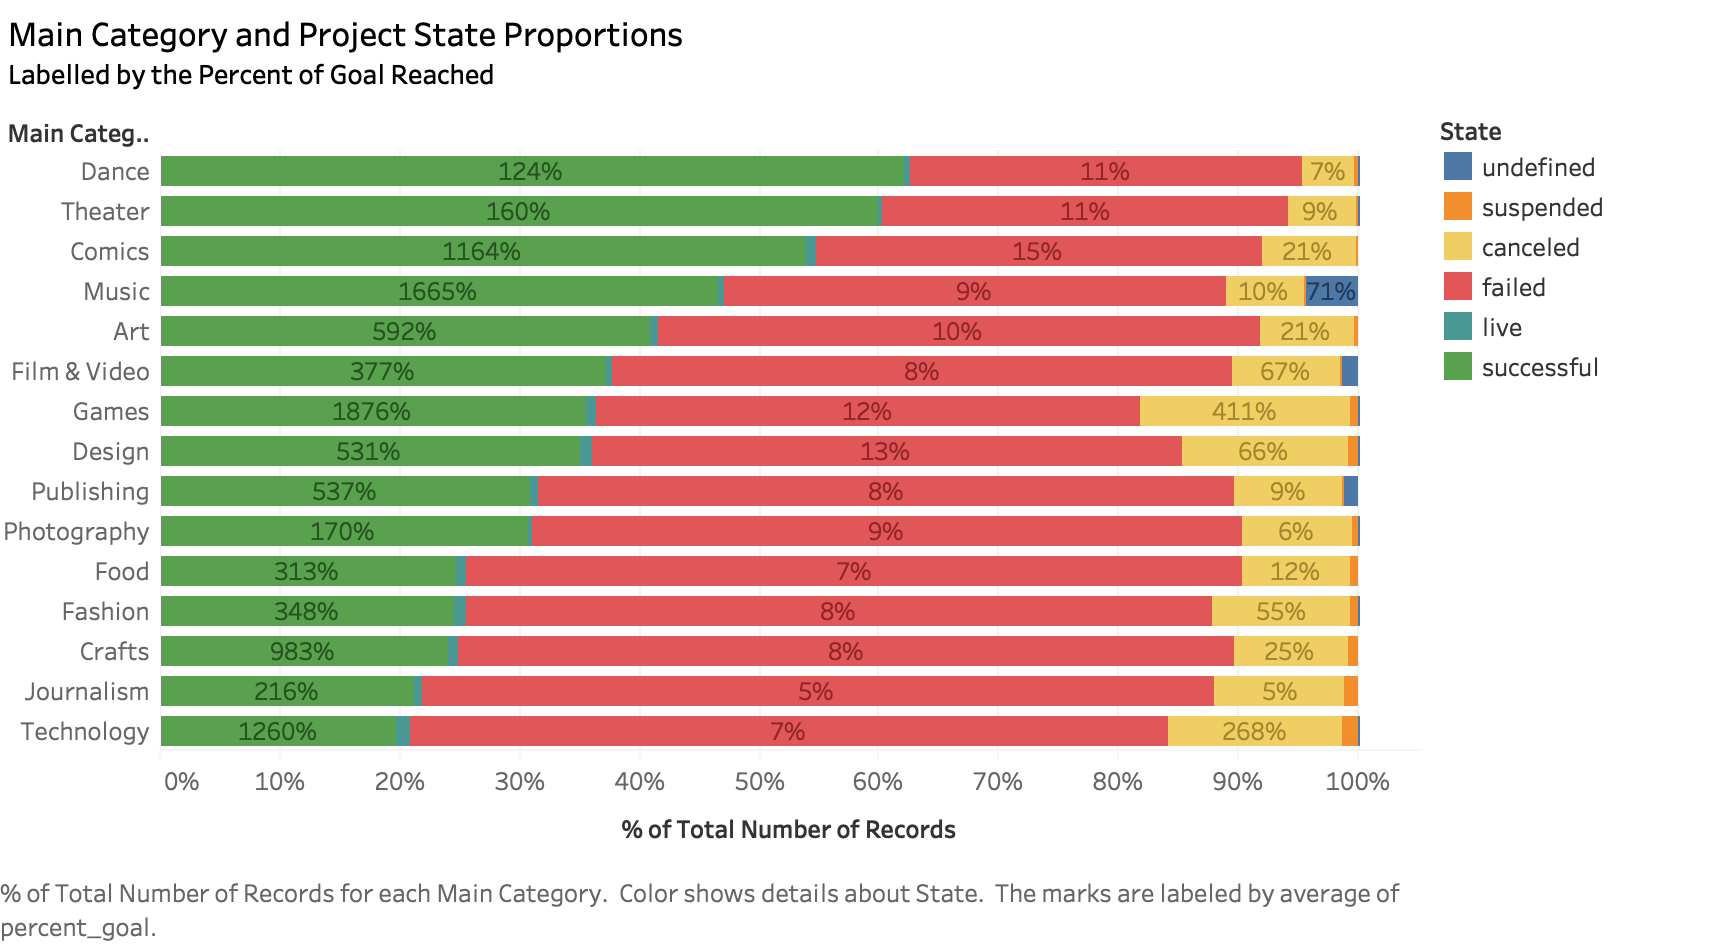

In [25]:
Image(filename='Q1/Q1.png') 

Based on the above graph we are able to get some interesting intuitions:
    
    1. Despite the prevalent rise of technological advancements, dance leads the way in successful projects
    
    2. We can see that Comics, Music, Games and Technology lead the way in securing huge funding, on average, for their
       projects --> this is indicative of general public interest and consumption pattern where most people seemed to be
       excited by ideas in these arenas. 
    
    3. What is very interesting to note is that projects in the area of technology that are successful have a high 'average
       percent of goal' reached but the lowest success rate. Furthermore, cancelled projects have a relatively high
       'average percent of goal' reached. --> This speaks to the inherent risk in many technology projects.

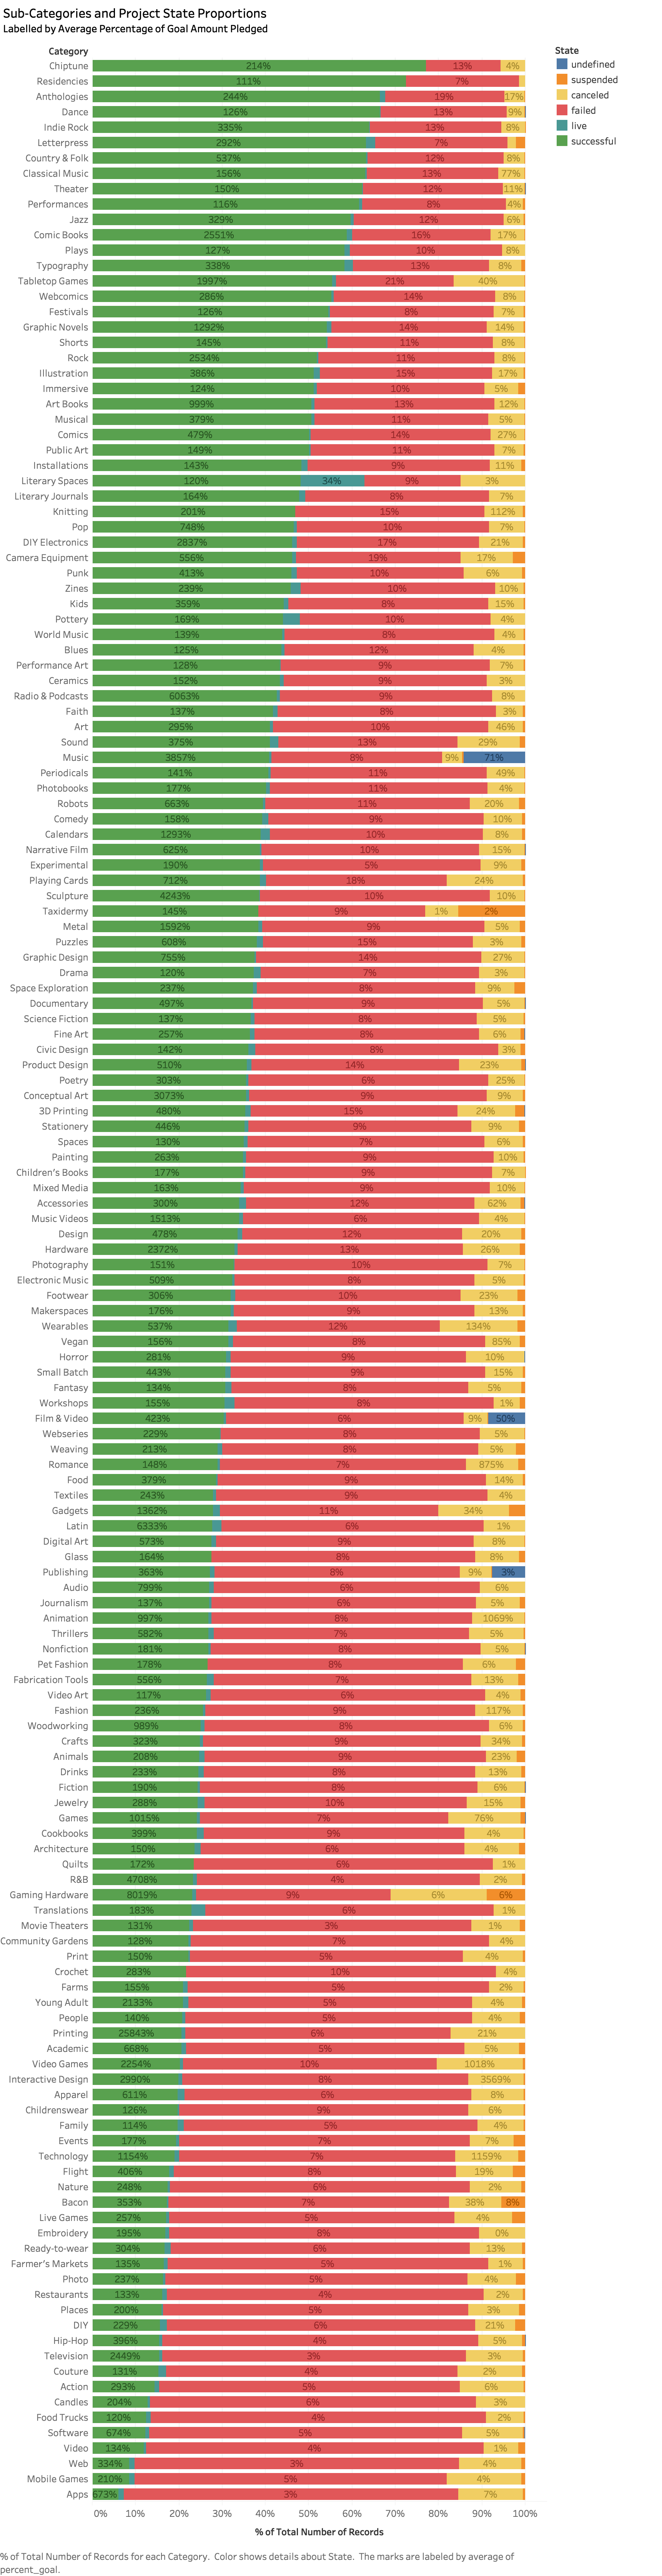

In [26]:
Image(filename='Q1/Q1(2) - All Subcategories.png') 

In terms of subcategories, there are some pretty interesting findings:
    
    1. Chiptune leads the way in success -->  both in terms of % of successful projects as well as having a healthy
       'average percent of goal' reached. Chiptune is known as 8-bit music and is a form of electronic music. Therefore
       we can see that even in other catgories such as music, technology seems to have permeated through to project ideas, 
       supporting our intuition of technological advances being seen as being the fulcrum of innovation.
    
    2. As you move down the graph, you will notice that the 'average percent of goal' reached for successful projects
       increase on average compared to the initial few subcategories. I think this is an extremely interesting finding as
       it gives us a cursory understanding of human behaviour on these crowdsourcing platforms explained below

#### Q1 Conclusion

<b> PEOPLE, IN GENERAL, LOOK FOR MAXIMUM REWARD WITH MINIMAL RISK!! </b> 

Therefore we see that perceived 'high risk' sub-categories that are part of technology are at the bottom of the graph with low success rates. However these 'high risk' projects that are successful have a high 'average percent of goal reached' because those projects are truly perceived by consumers to be revolutionary

Whereas, sub-categories that have high success rates (near the top of the previous graph) have lower 'average percent of goal reached' as they seem to be perceived as low risk projects that consumers would not mind backing

### Q2 : Which range of fundraising goal amounts has the highest success rate in meeting the goal?

For this question we measured success based on the 'state' column of our dataset that classifies whether a project is successful or not. Thus, below shown are 3 charts, each with a different bin size of goal amounts where the 'state' of a project is measured in each bin

#### Goal Amount against State of the Project (binwidth of 10k)

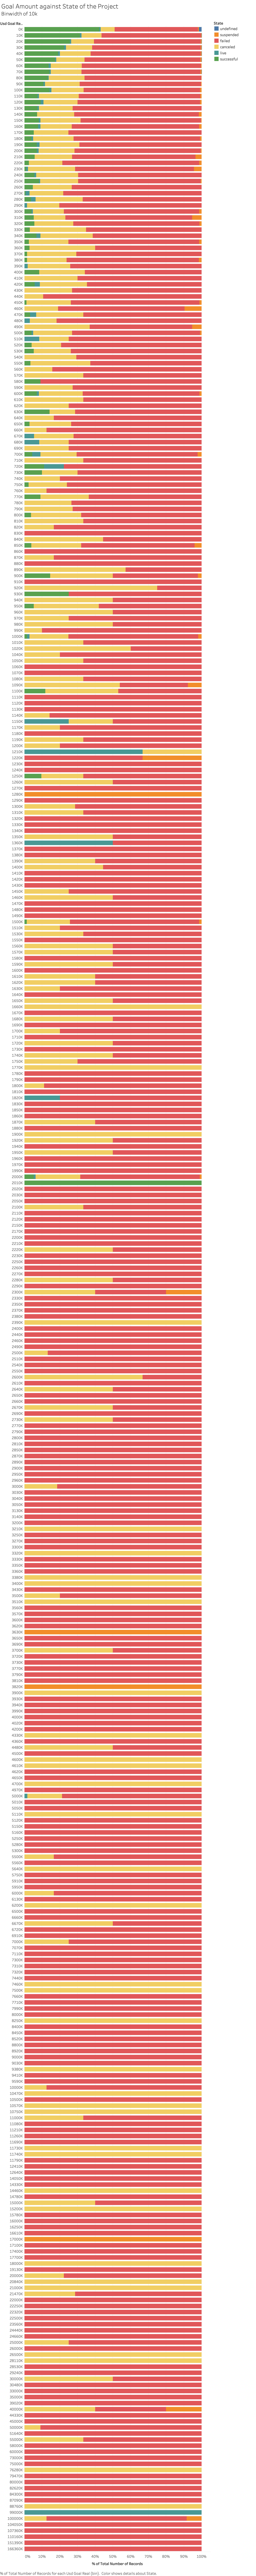

In [27]:
Image(filename='Q2/Q2(1).png') 

The above graph shows the split of projects which are either 'successful', 'live', 'undefined' etc. for each bin of size USD 10,000. We can see from the above graph that projects which have a goal amount between USD 0 and USD 10,000 have the highest success rate, followed by projects with goals between USD 10,000 and USD 20,000. The success rate seems to decrease monotonically up to the USD 100,000 mark

Beyond the USD 100,000 mark, the success rate does decrease but sporadically with minor increases in between. This seems rational as higher value projects may be more successful depending on the scope, category, value and interest generated by the project. But why do projects with value up to USD 90,000 decrease monotonically?

To get a better understanding of why this is the case, let us drill down into this plot a little more...

#### Goal Amount against State of the Project (binwidth of 1k)

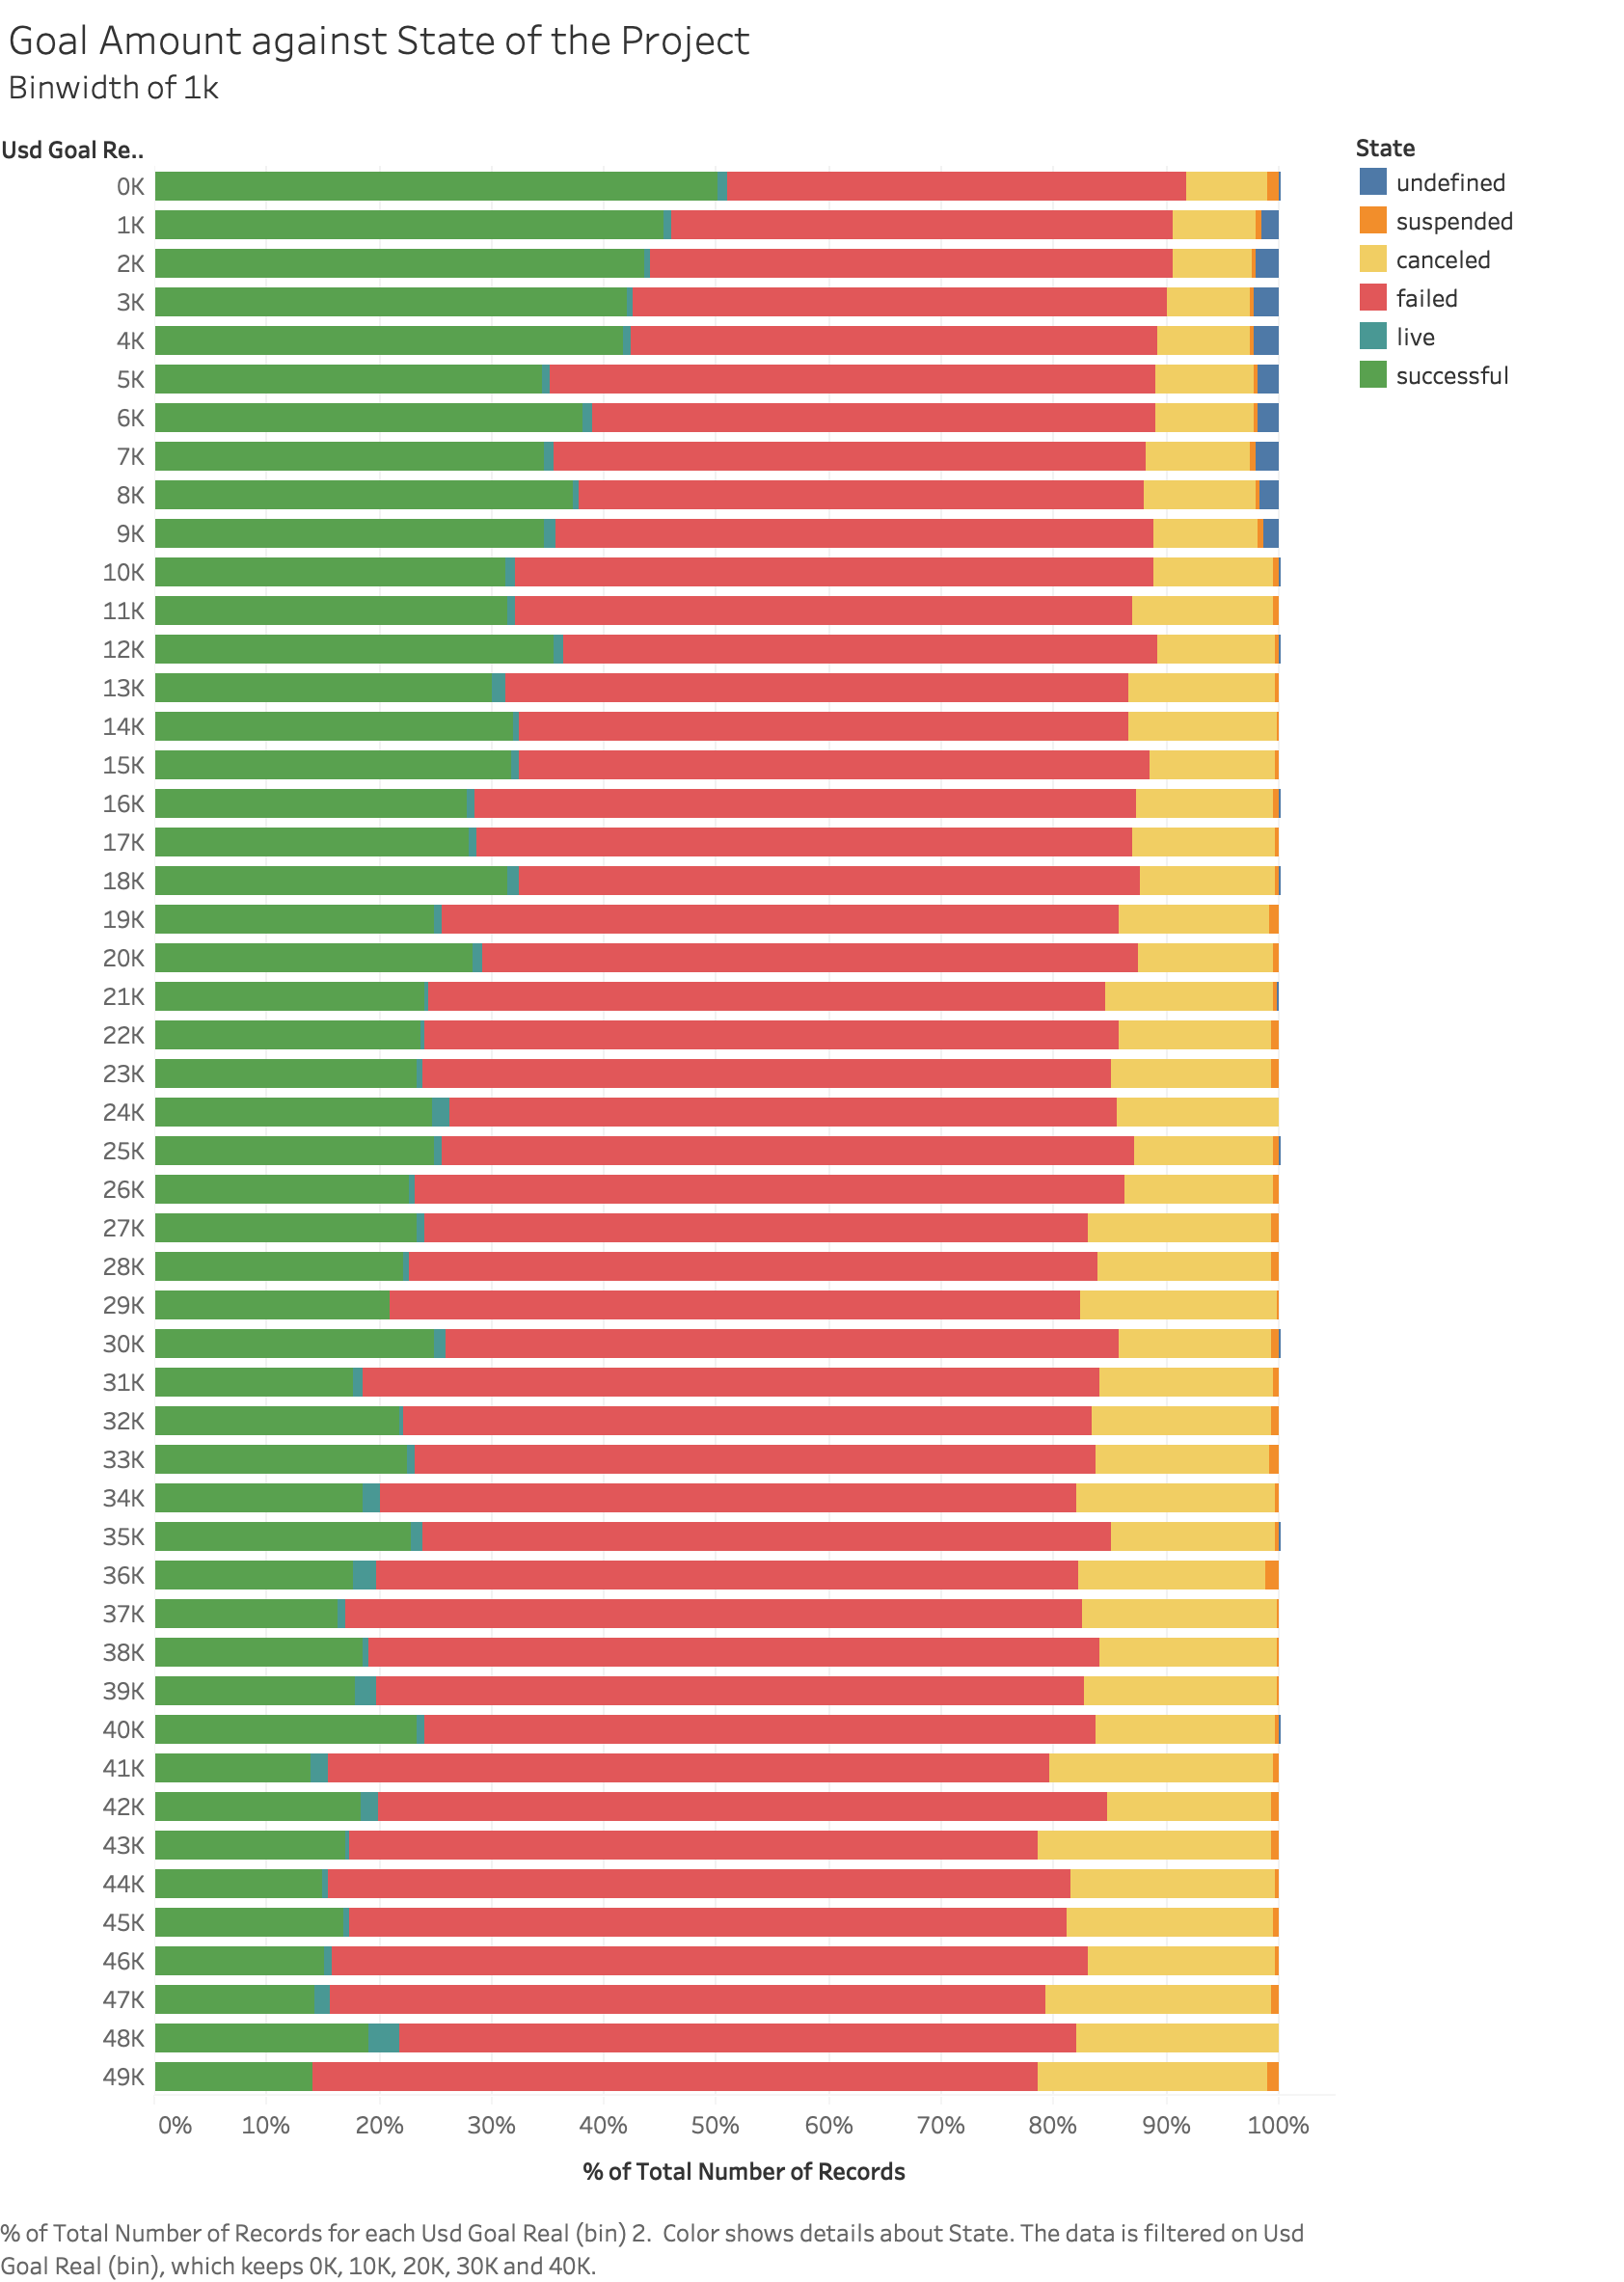

In [28]:
Image(filename='Q2/Q2(2).png') 

When reducing the bin size of the earlier plot to USD 1000 (as seen above), we see that the success rate monotonically decreases to only about USD 4,000 and then starts to fluctuate sporadically where the rate of decrease is slower for higher amounts.

Can we go deeper?....

#### Goal Amount against State of the Project (binwidth of 500)

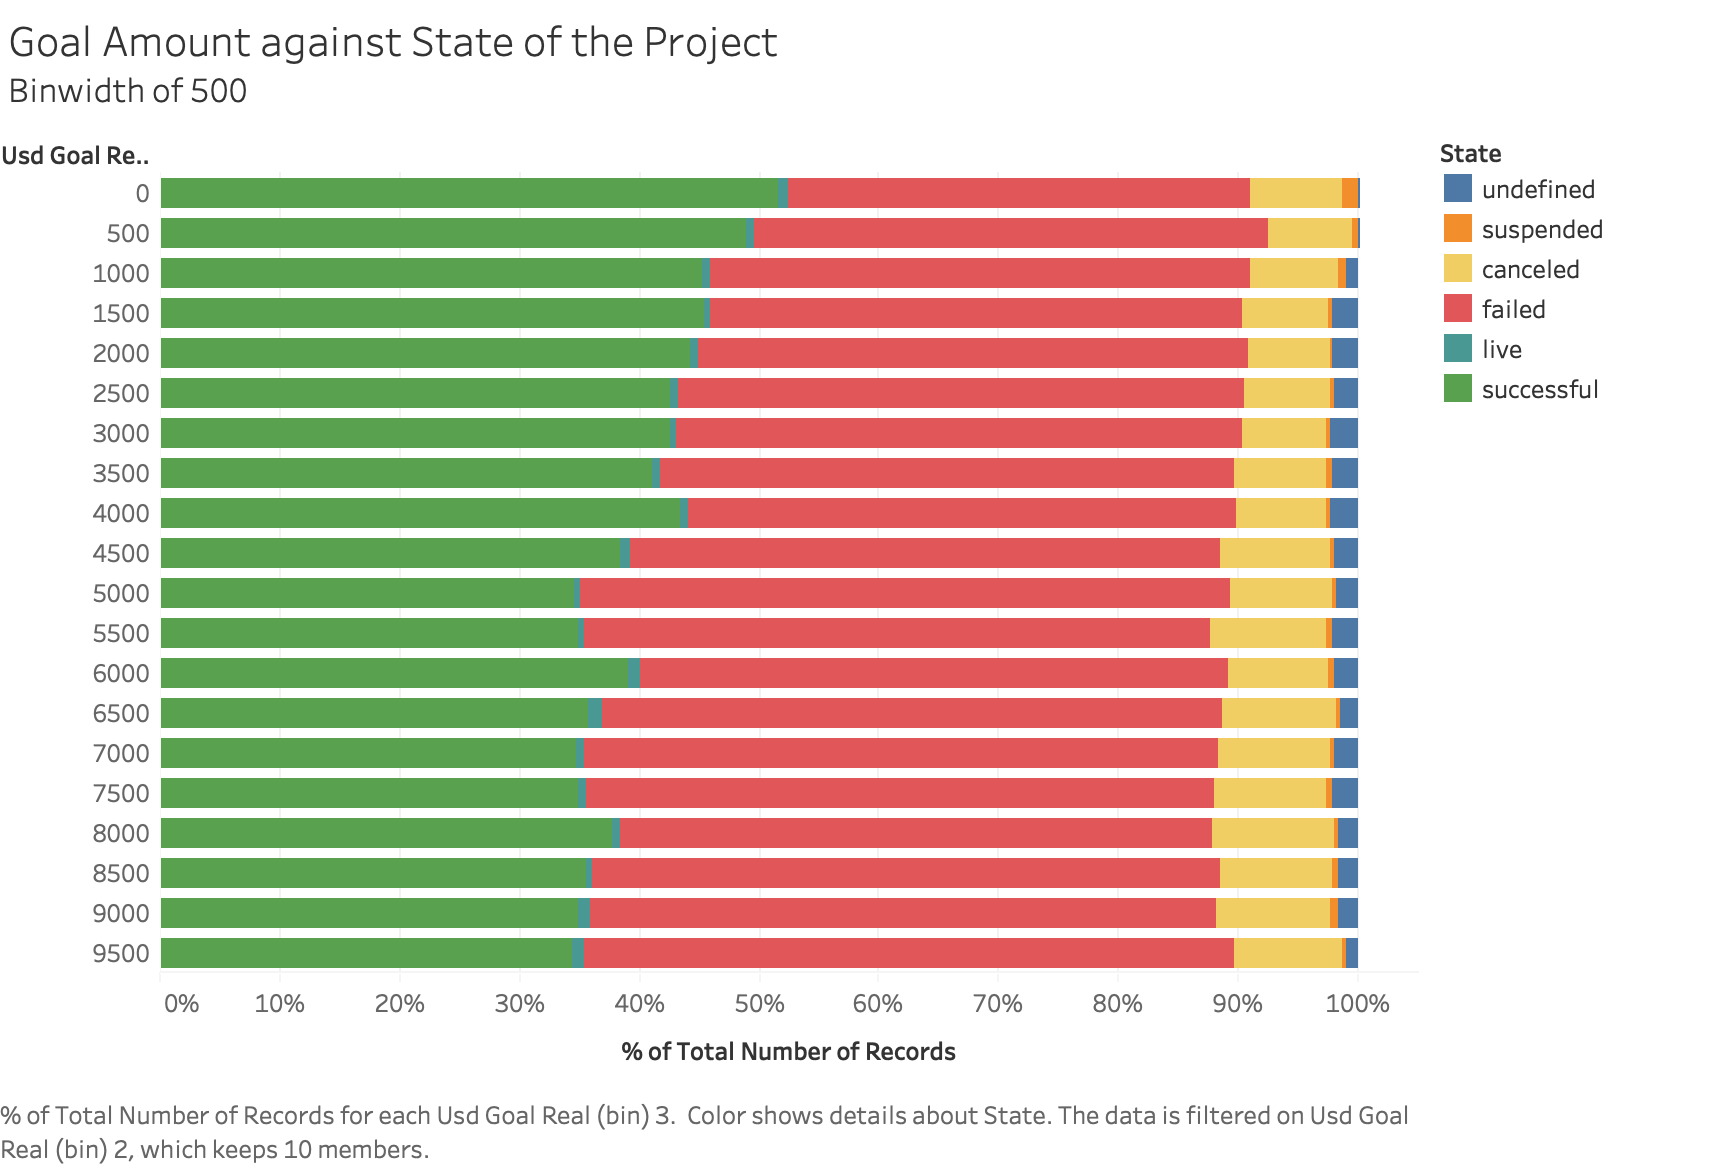

In [29]:
Image(filename='Q2/Q2(3).png')

After reducing the bin size to only about USD 500, we see that the plot is far more informative as it shows us that the biggest decrease in success rate is between USD 0 and USD 4,000 after which the success rates for the following bins show very little decrease with expected sporadic fluctuations.

Thus it can be seen that general consumers are comfortable backing projects that are within a goal amount of at most <b>USD 4000!</b> supporting our earlier finding from Q1 that most general consumers on crowdsourcing platforms are risk-averse

Beyond the USD 4000, the success of the project in meeting its goal amount seems to vary on a project by project basis

#### Q2 Conclusion

The above finding is not suprising and is in fact expected in crowdfunding platforms. Ventures on KickStarter are backed by general consumers who have minimal capital or savings and thus are more comfortable making smaller contributions as opposed to larger expensive ones. Therefore the larger the scope of the project gets, the more apprehensive a consumer might feel in backing the project

### Q3 : Which time of the year is the best time to launch a kickstarter project? / Do certain time durations of the projects have better success rates than other?

Our team felt that this question would be very interesting to explore as, chances are, there are many projects that may be seasonal in nature or there might be a feature or pattern to human behaviour that might make certain months of year more appealing to launch projects or browse through projects to invest in, than others.

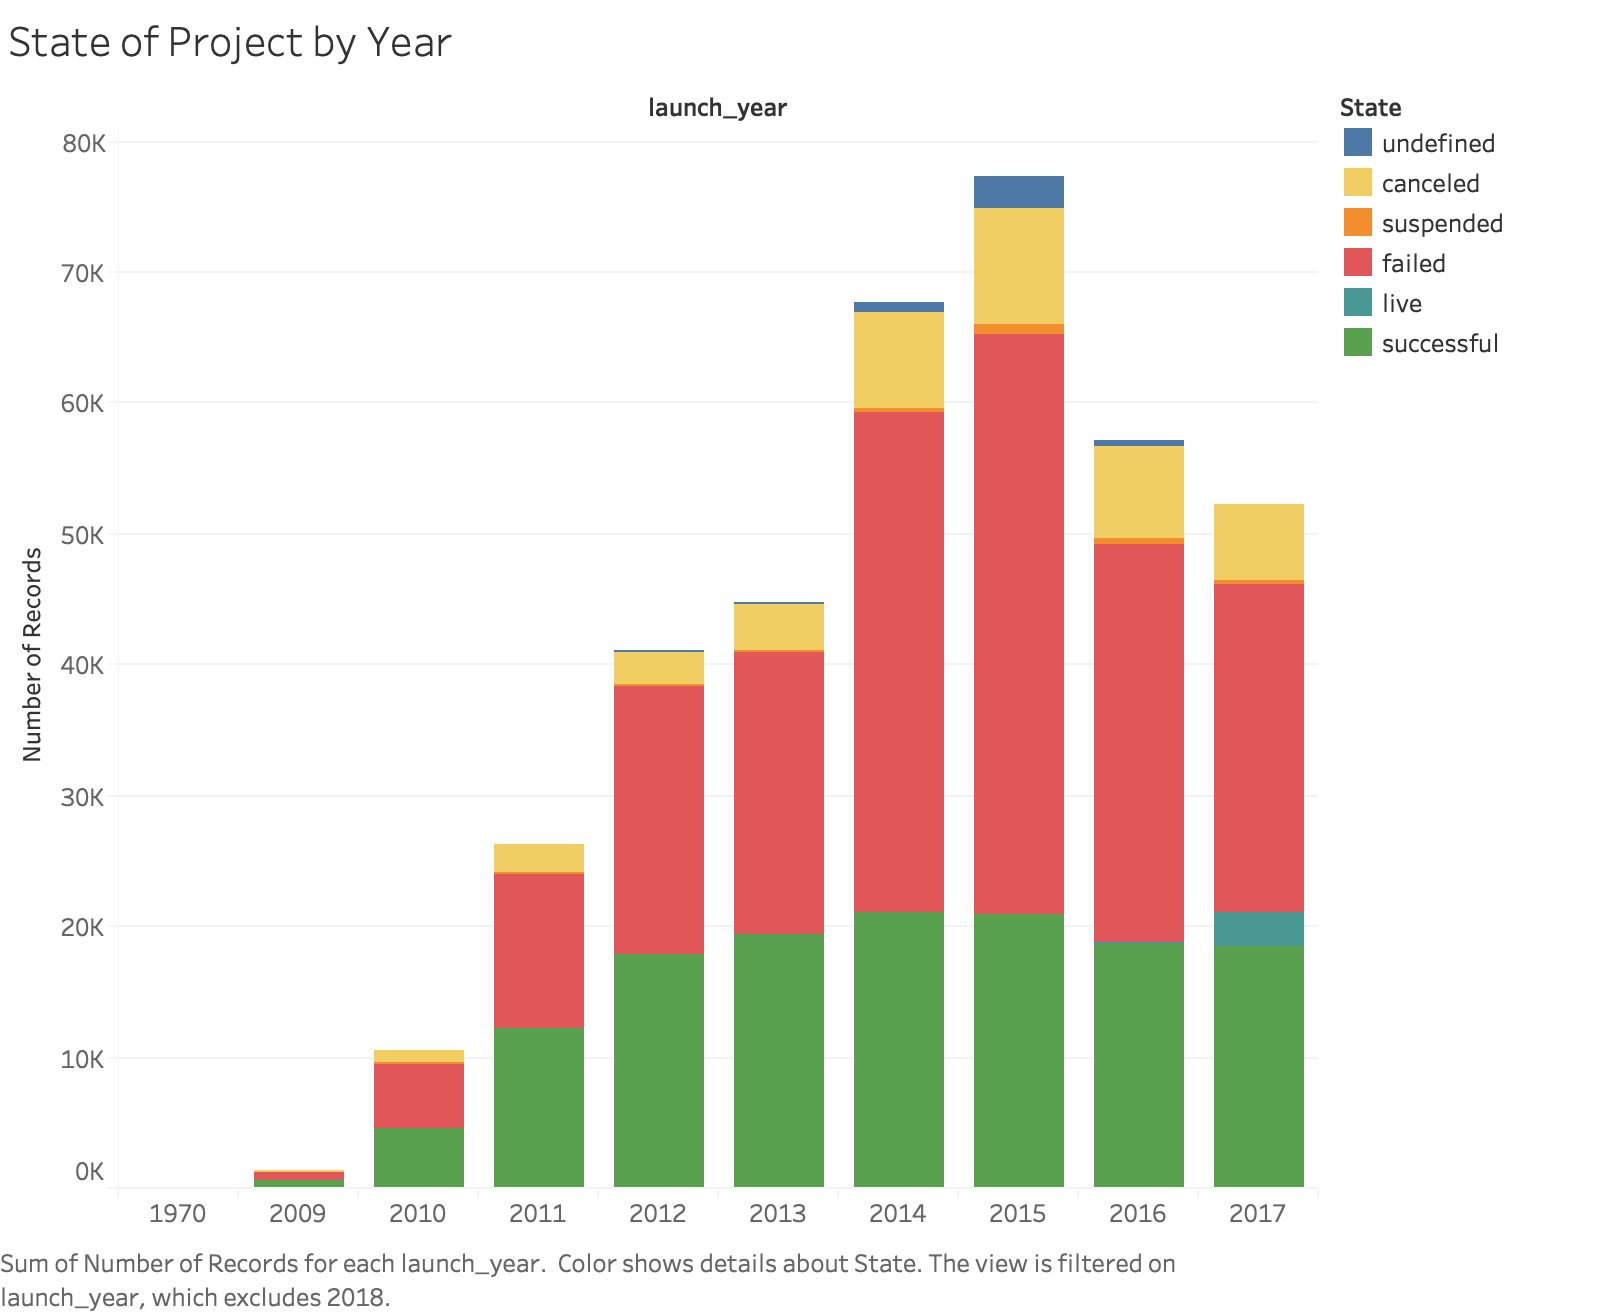

In [30]:
Image(filename='Q3/Q3.png')

The above graph shows the number of kickstarter projects launched across all the years, mainly starting from 2009 to 2017. We removed the 2018 plot as not all the projects launched in 2018 were recorded in this dataset and including a lower value for the number of projects for 2018 might make the above plot misleading.

The above plot is interesting as what we see is that the number of successful projects from about 2012 to 2015 onwards has 
stayed relatively constant while the actual number of projects posted on the KickStarter platform has increased. I believe that this speaks to the increasing <b> popularity </b> of the platform and the ease with which an idea can get crowdfunded and quickly gain a chance to turn to reality. 

However we also notice that there is a decrease in the total number of projects between 2015 and 2017, while the number of successful projects has stayed relatively constant. This actually speaks more to the <b> quality </b> of the platform itself as the number of failed or cancelled projects has come down and users have a better understanding as to the kind of projects that gain appeal and achieve success on Kickstarter.

While we do see the increase in both popularity and quantity of projects on the platform, might there be weeks in a year that are 'inauspicious' to launch projects in?

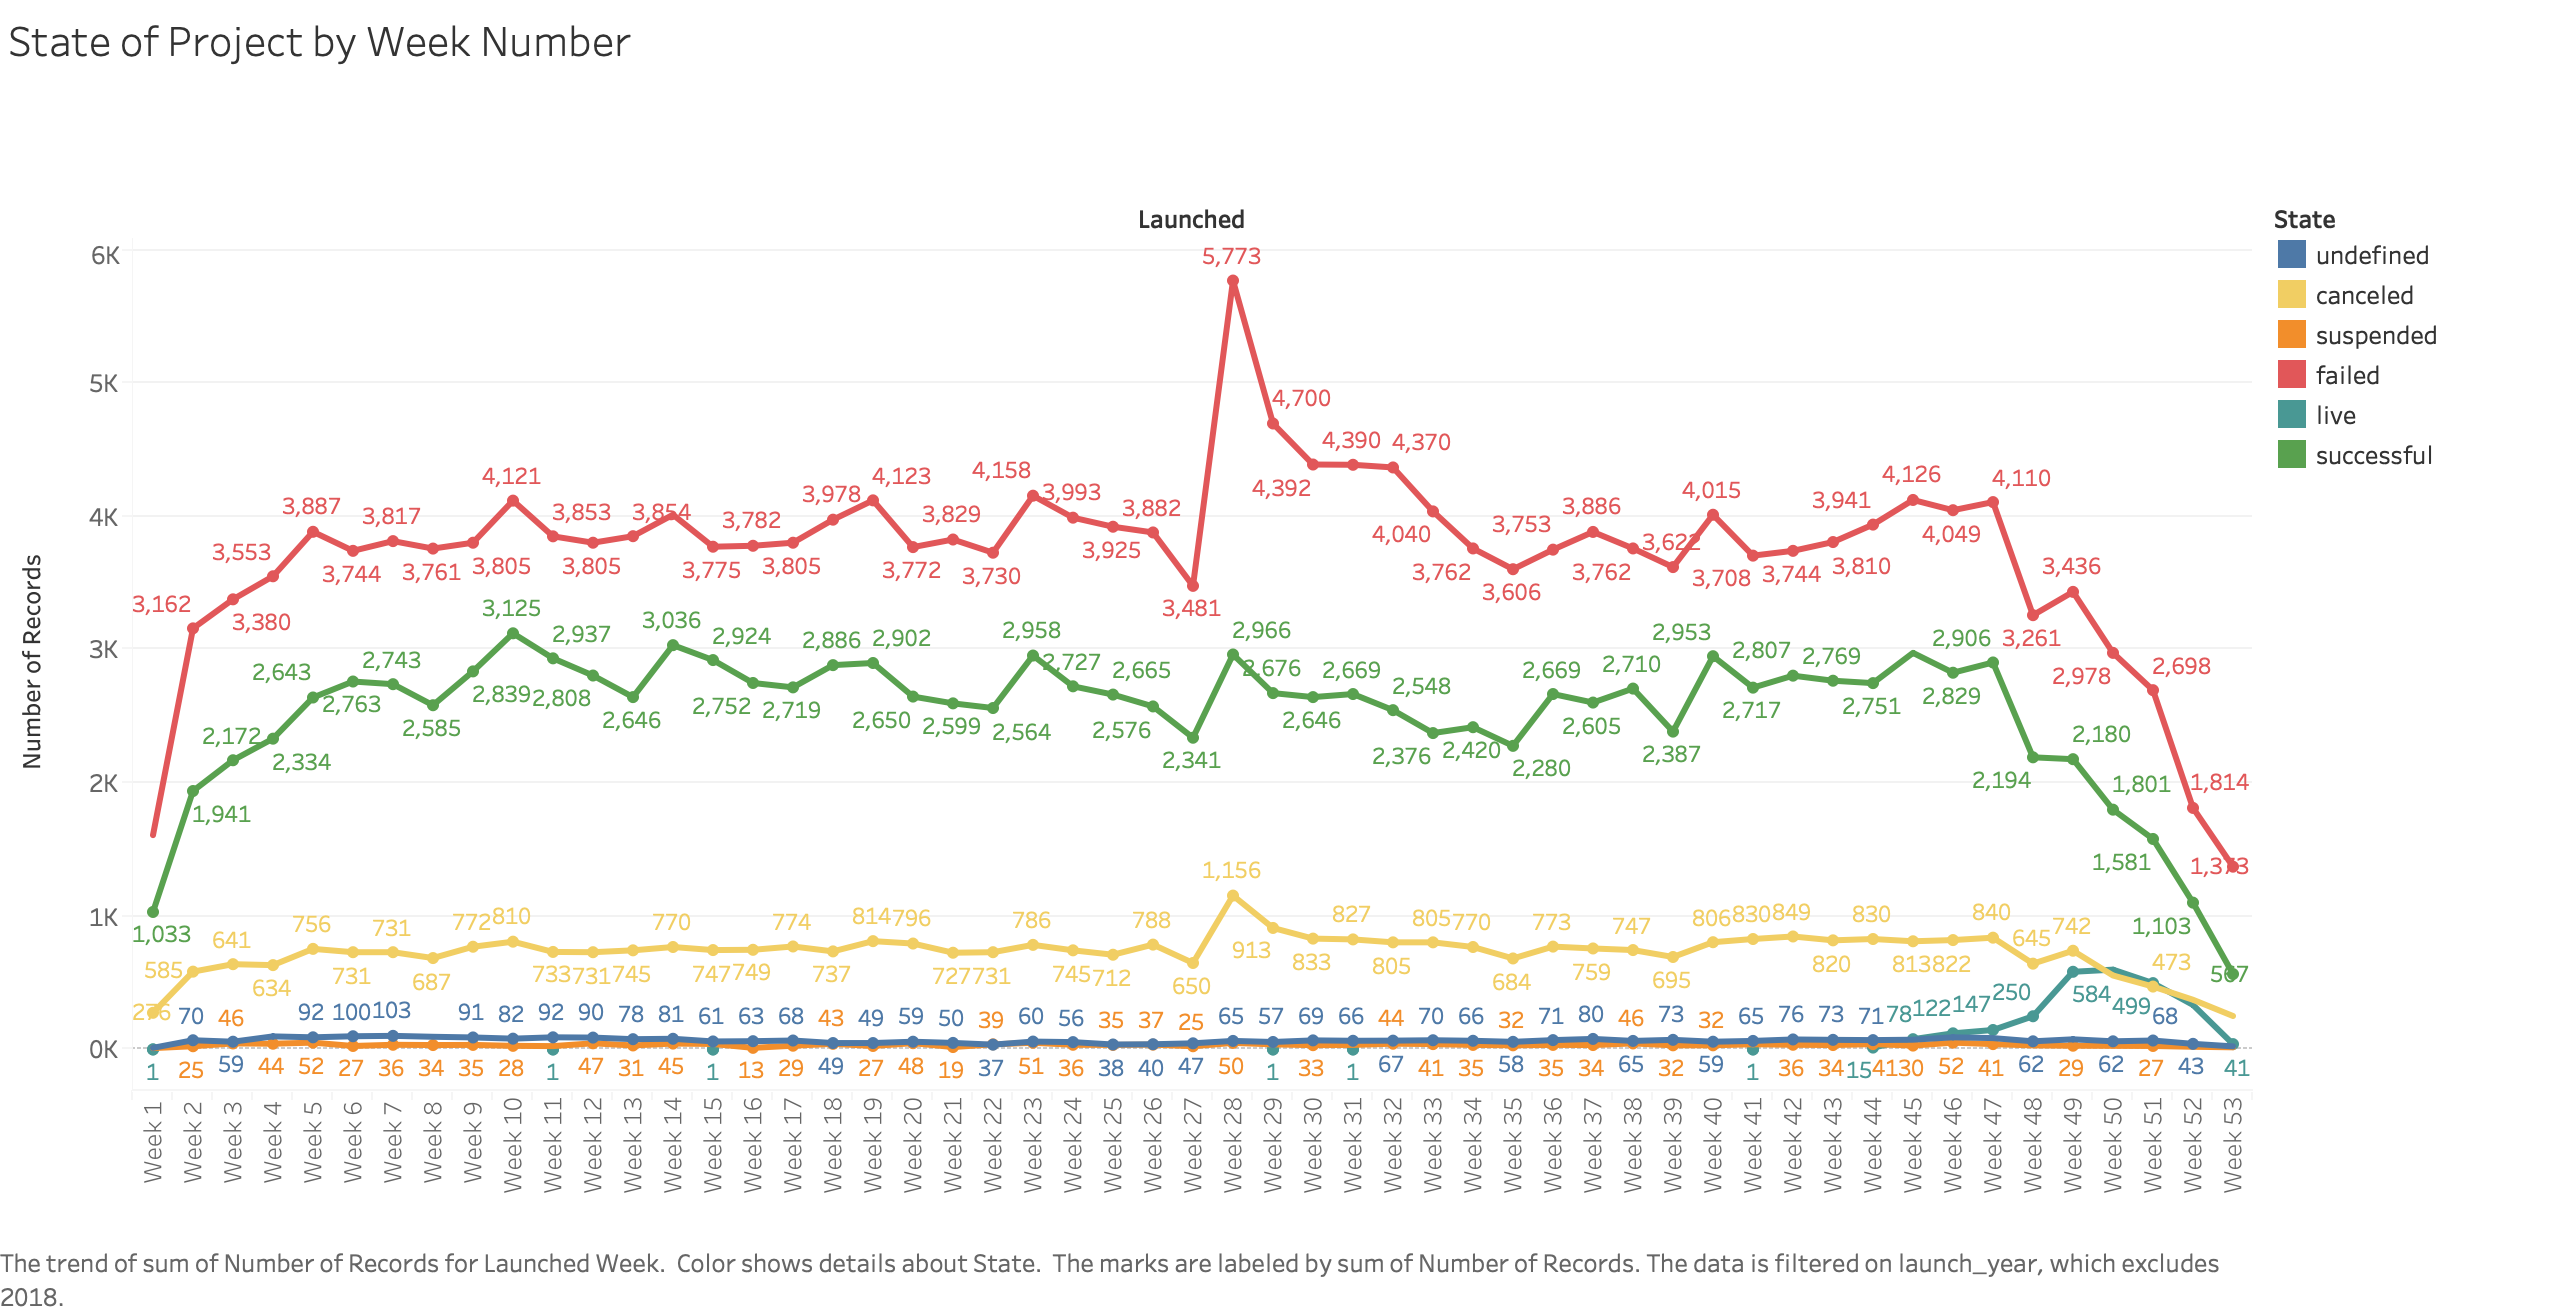

In [31]:
Image('Q3/Q3 - State by Week No.png')

Analyzing the graph above, we can see that right around the middle of the year between Weeks 27-29 in the number of projects launched, with a relatively sustained dip in the prior weeks before Week 27. 

Furthermore we can also see that there is a significant decrease in the number of launched projects towards the end of the year and a significant increase in the initial weeks of the year.

What I find is even more interesting in the above plot is that the trend lines for success, failure & cancelled projects follow almost the exact same trajectories through all the weeks of the year and these trajectories align with the school year!

<b> *The reason for the above phenomenon is that, during the summer holidays (right around Weeks 27 - 29), many young people, particularly students, use that time to brainstorm new ideas and test their idea in an open marketplace. That is one of the main reasons we see a huge spike in the summer months, but more importantly, a much larger spike in failures than in successes. This is also not surprising and perhaps should be expected considering that 25-34 is the predomiant age group that uses KickStarter.*
    
*Furthermore the decline towards the end of the year with a spike in the beginning is not surprising as new ventures would be affected by factors such as the Thanksgiving, Christmas and New Year holidays* </b>

### Q4.  Which country has the highest success rate of projects?

Given the rising popularity of KickStarter (as shown earlier) we felt that it might be interesting to explore the impact
of this platform in different countries and how KickStarter might have changed the startup scene in those countries as well.

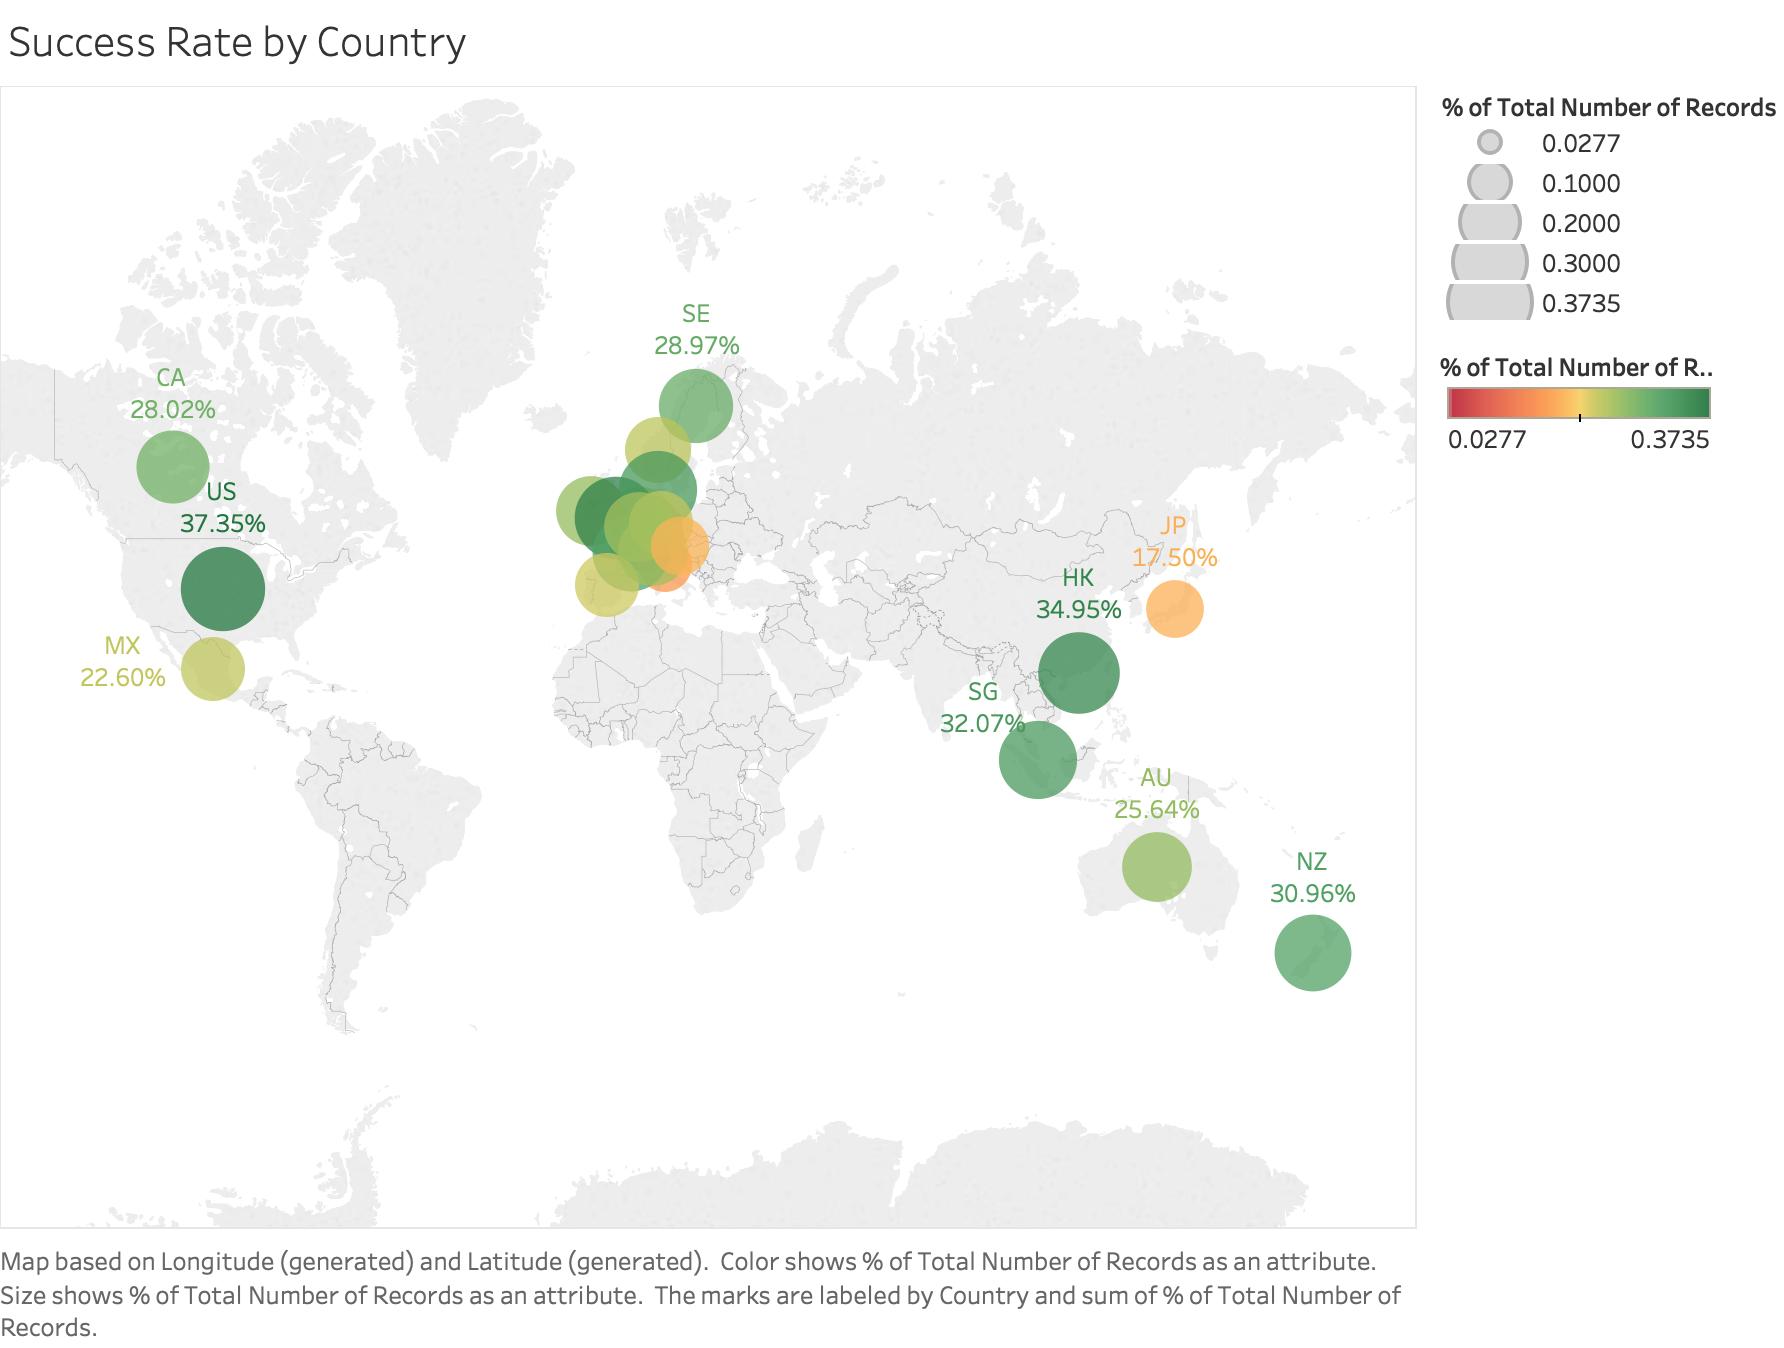

In [32]:
Image('Q5/Q5 - World.png')

The above heat map depicts the percentage of all KickStarter projects of each country happening around the world and their respective succcess rates. From the above map we can see that developed countries with vibrant startup hubs like the United States, Singapore, Hong Kong and a few Western European countries have a far higher success rate with a larger number of projects than many other countries.

What is unique about the above heat map, in particular is Japan. Although Japan is a highly developed country with a substantial proportion of KickStarter projects, these projects, on average, are not as successful as those of other developed countries. One of the main reasons behind this, is traditional Japanese values that emphasize hardwork, role committment and loyalty to company and work. Therefore the startup scene in a modern economy like Japan is not as vibrant as many other countries.